In [2]:
import pandas as pd
import numpy as np

In [3]:
df_red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")

If your internet connection is slow, you can directly read from the local files. Uncomment (remove #) before you execute.

In [4]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df_red.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
df_red.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Assing input (X) and output (y)

In [9]:
y = np.where(df_red['quality'].values > 6,1,0)
y=pd.DataFrame(y)
y.columns=['quality']

X = df_red.iloc[:,0:11]
red1=pd.concat([X, y],axis=1)

visualize the data and find the most important 2 features 

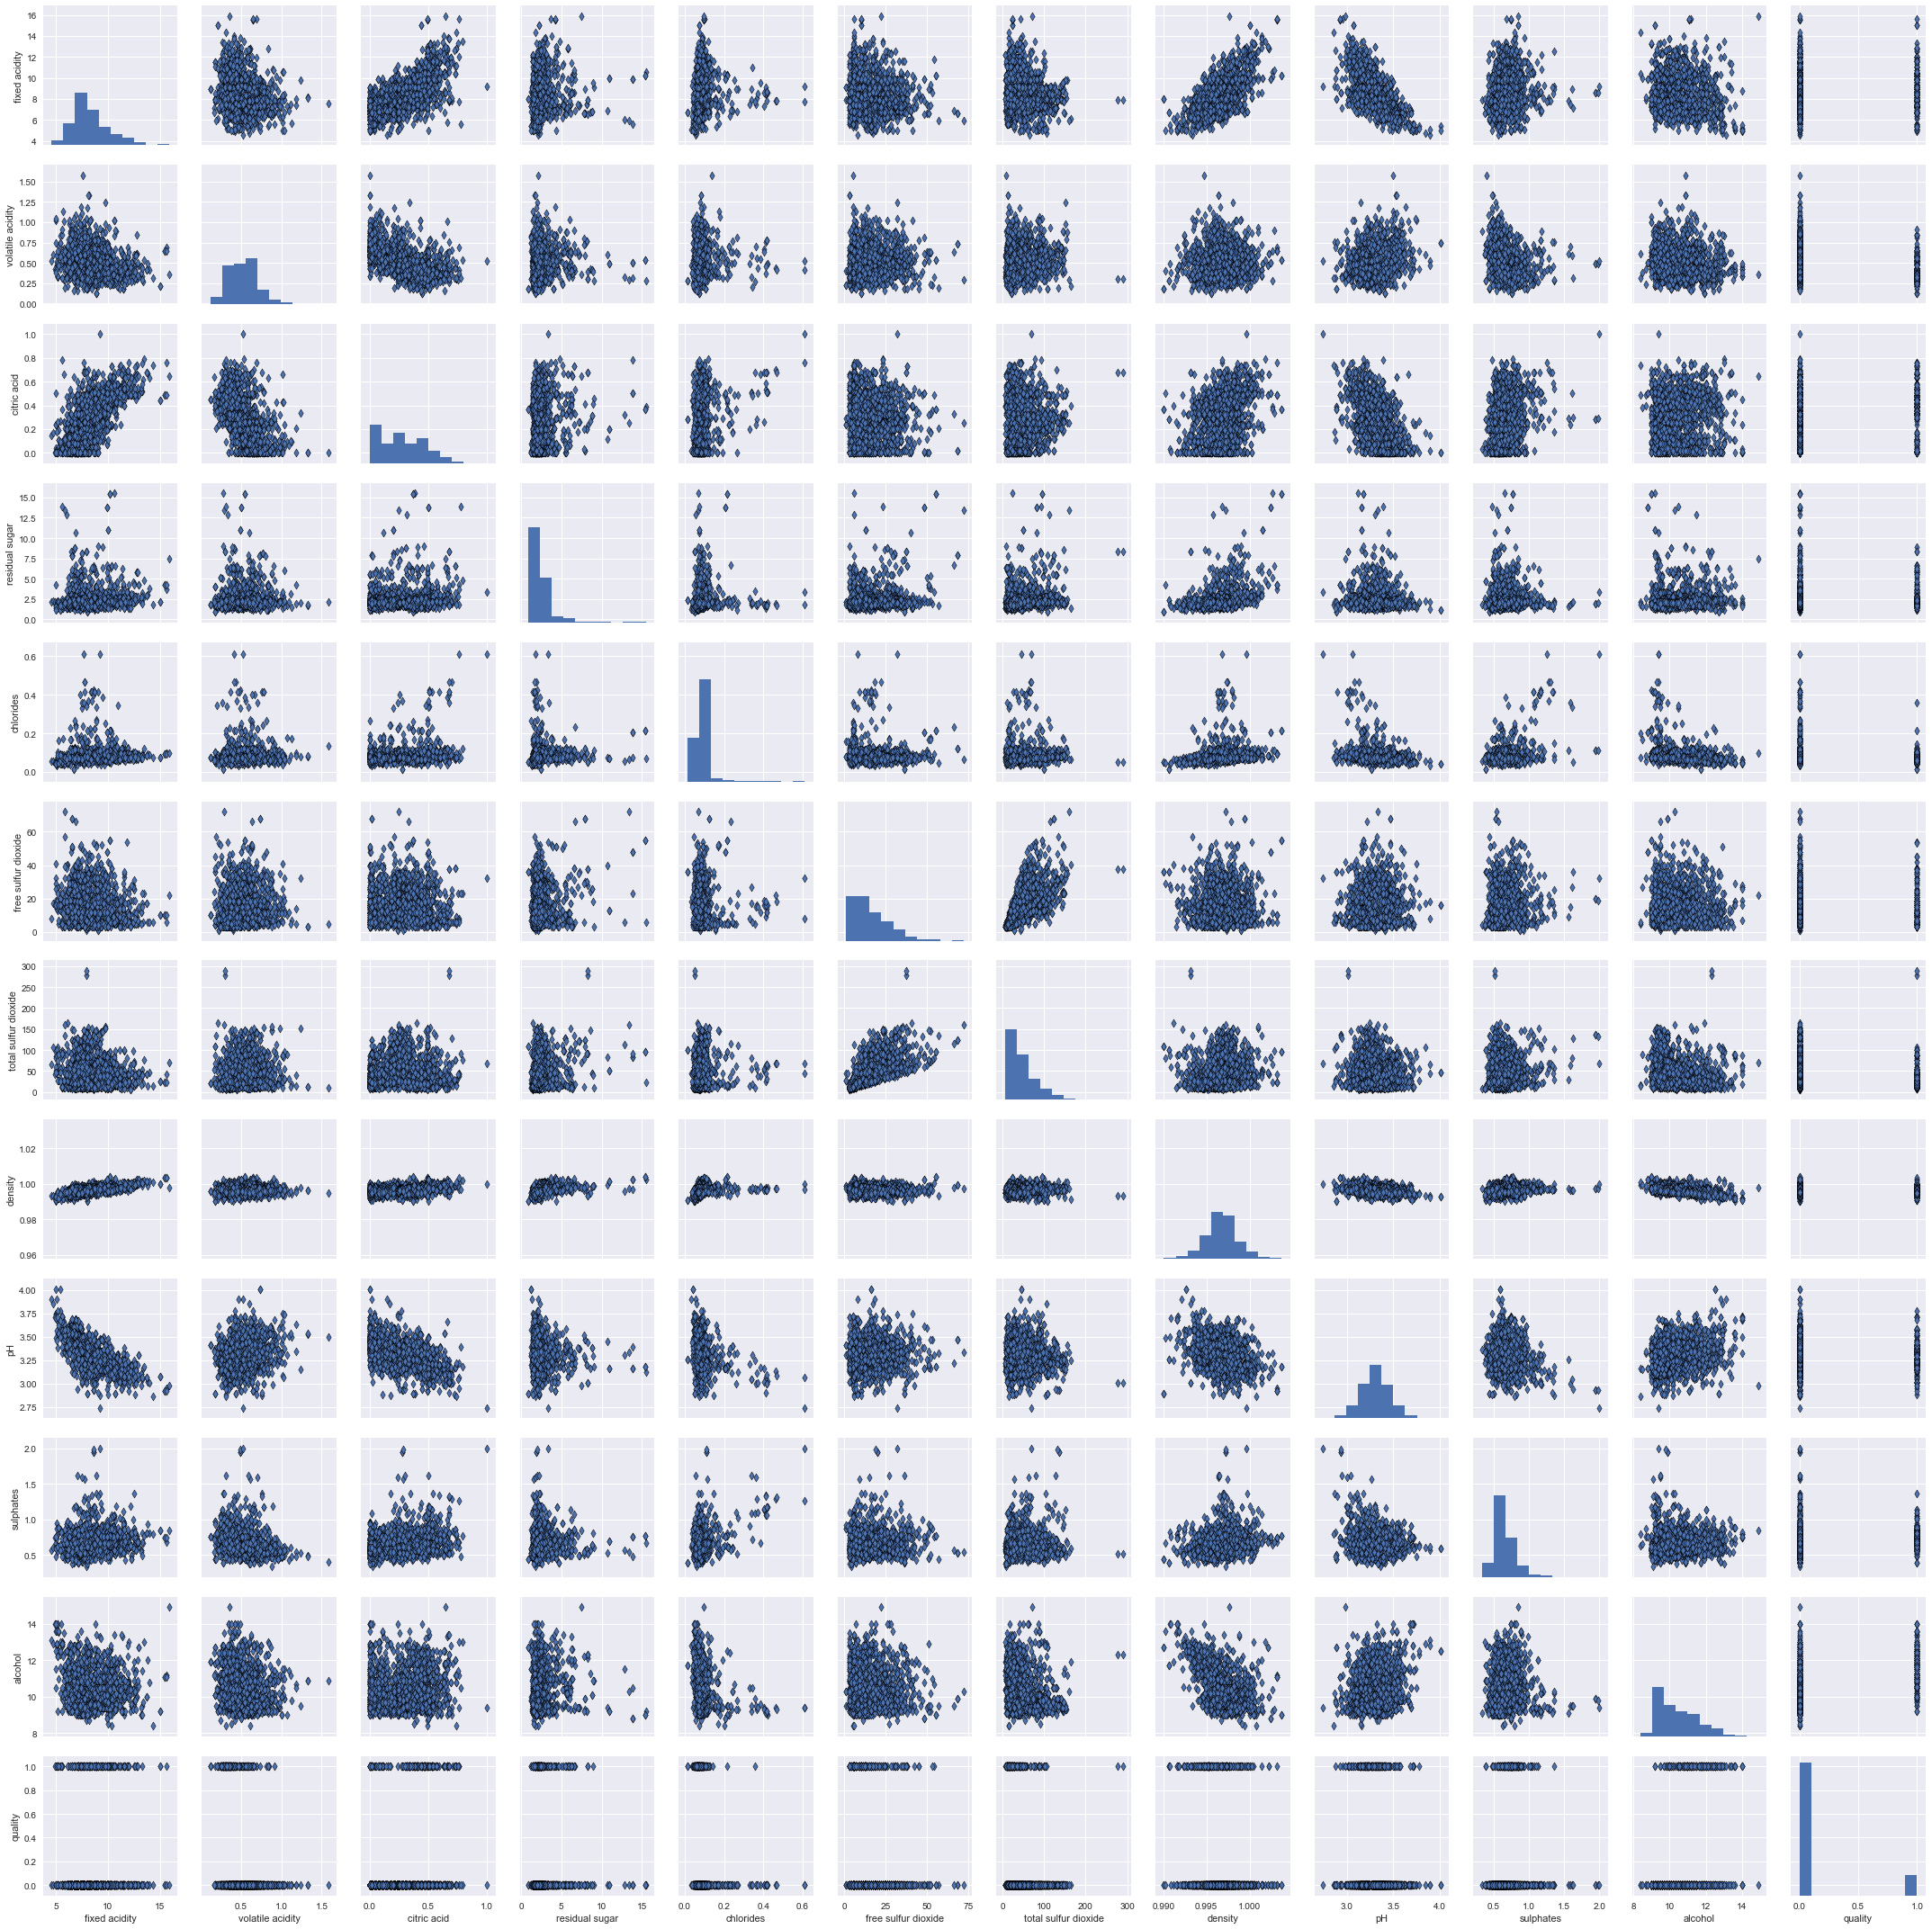

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

g=sns.pairplot(red1, markers='d', size=2.5, plot_kws=
    {"s":40,
    "alpha":1.0,
    'lw':0.5,
    'edgecolor':'k'})
plt.show()

make the heat map

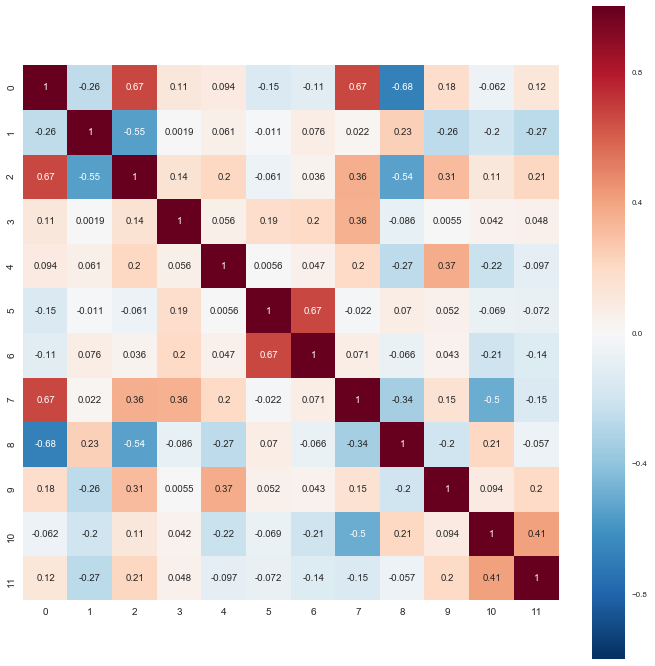

In [15]:
f, axes = plt.subplots(1, 1, figsize=(12, 12), sharex=True)

cm = np.corrcoef(red1[red1.columns].values.T)
sns.set(font_scale=0.8)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 )
plt.show()

then 'volatile acidity' and 'alcohol' are found to be the most important futures

split the train and test sets

In [17]:
y=(df_red['quality'].values > 6)
x=X.loc[:,['volatile acidity','alcohol']]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.3, random_state=0)

import sevaral methods

In [18]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=3,
                              random_state=0)

bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=10, 
                        max_samples=10, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1)

ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=10, 
                         learning_rate=0.5,
                         random_state=0)

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=2, 
                                random_state=1,)


find the accurencies of the method

In [19]:

for idx, clf, tt in zip([0,1,2,3],[tree, bag, ada, forest],['Decision Tree','Bagging', 'AdaBoost','Random Forest']):
   
        clf.fit(x_train, y_train)
    
        y_train_pred = clf.predict(x_train)
        y_test_pred = clf.predict(x_test)

        clf_train = accuracy_score(y_train, y_train_pred)
        clf_test = accuracy_score(y_test, y_test_pred)
    
        print('%s train/test accuracies %.3f/%.3f'% (tt,clf_train, clf_test))

Decision Tree train/test accuracies 0.869/0.883
Bagging train/test accuracies 0.857/0.881
AdaBoost train/test accuracies 0.890/0.875
Random Forest train/test accuracies 0.931/0.875


define the visualization function

In [20]:

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def pl(X,y,cl):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y_test))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.05),
                           np.arange(x2_min, x2_max, 0.05))
    
    Z = cl.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(X[y == l, 0], X[y == l, 1], alpha=0.68,
                    c=c, label=l, marker=m)

    plt.scatter(x=X[wrong_y==True,0],y=X[wrong_y==True,1],
                c='black',
                alpha=1,
                marker='v',
                s=66, label='wrong prediction')

    plt.xlabel('volatile acidity')
    plt.ylabel('alcohol')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()


define the confusion matrix function

In [24]:

from sklearn.metrics import confusion_matrix

def CM(output):
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(output, cmap=plt.cm.Blues)
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            ax.text(x=j, y=i, s=output[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

do preprocessing

In [25]:

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
x_train_std = stdsc.fit_transform(x_train)
x_test_std = stdsc.transform(x_test)

visualization of the decision tree

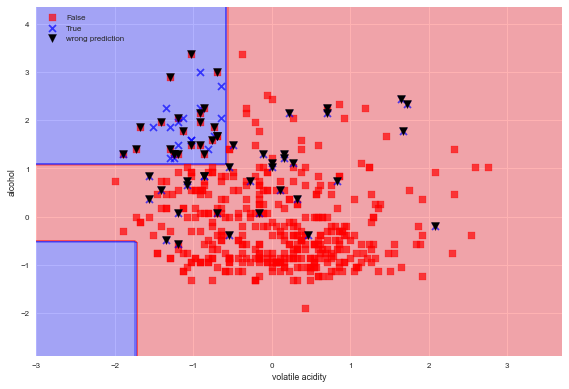

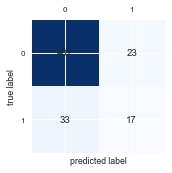

In [26]:

tree.fit(x_train_std,y_train)
y_pred=tree.predict(x_test_std)
wrong_y = (y_test!=y_pred)

pl(x_test_std,y_test,tree)

output = confusion_matrix(y_true=y_test, y_pred=y_pred)
CM(output)

visualization of the bagging

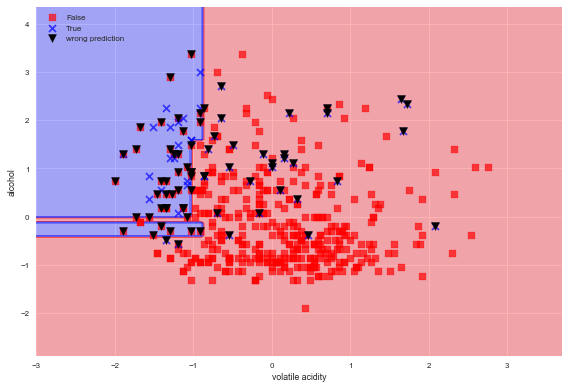

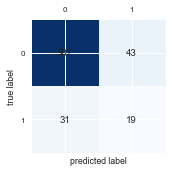

In [27]:

bag.fit(x_train_std,y_train)
y_pred=bag.predict(x_test_std)
wrong_y = (y_test!=y_pred)

pl(x_test_std,y_test,bag)

output = confusion_matrix(y_true=y_test, y_pred=y_pred)
CM(output)

visualization of the AdaBoost

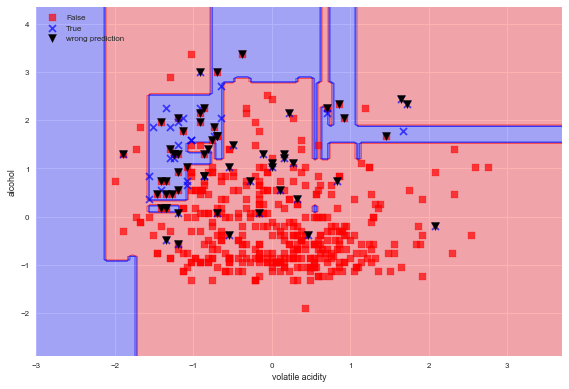

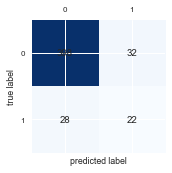

In [28]:

ada.fit(x_train_std,y_train)
y_pred=ada.predict(x_test_std)
wrong_y = (y_test!=y_pred)

pl(x_test_std,y_test,ada)

output = confusion_matrix(y_true=y_test, y_pred=y_pred)
CM(output)

visualization of Random Forest

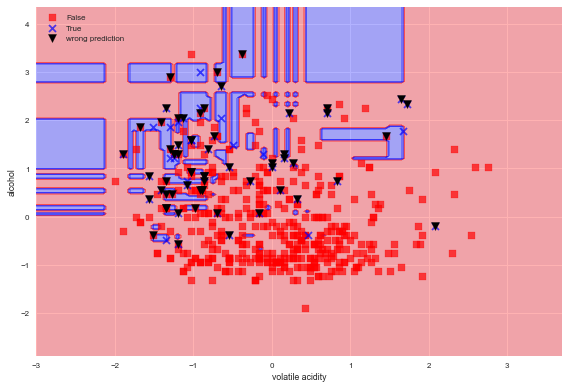

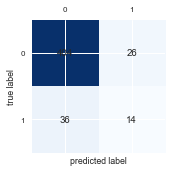

In [29]:

forest.fit(x_train_std,y_train)
y_pred=forest.predict(x_test_std)
wrong_y = (y_test!=y_pred)

pl(x_test_std,y_test,forest)

output = confusion_matrix(y_true=y_test, y_pred=y_pred)
CM(output)

KNN method and the visualization 

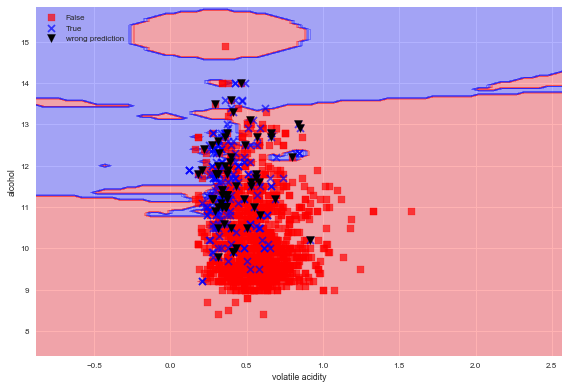

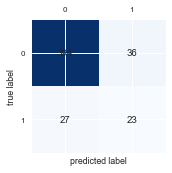

In [31]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15, weights='distance', p=2, metric='minkowski')
knn.fit(x_train, y_train)

x_combined = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))

y_pred=knn.predict(x_test)
ypred=np.hstack((y_train, y_pred))
wrong_y = (y_combined!=ypred)

pl(x_combined, y_combined,knn)

output = confusion_matrix(y_true=y_test, y_pred=y_pred)
CM(output)

k-fold validation of KNN method

In [33]:

from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5,random_state=1).split(x_train_std, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    knn.fit(x_train_std[train], y_train[train])
    score = knn.score(x_train_std[test], y_train[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold: 1, Class dist.: [761 133], Acc: 0.862
Fold: 2, Class dist.: [761 133], Acc: 0.849
Fold: 3, Class dist.: [762 134], Acc: 0.870
Fold: 4, Class dist.: [762 134], Acc: 0.857
Fold: 5, Class dist.: [762 134], Acc: 0.870

CV accuracy: 0.862 +/- 0.008
